In [1]:
#import basic libary  
import math 
import pandas as pd                     # to extract data from dataset(.csv file)
import csv                              #used to read and write to csv files
import numpy as np                      #used to convert input into numpy arrays to be fed to the model
import matplotlib.pyplot as plt         #to plot/visualize sales data and sales forecasting
import seaborn as sns


# Holiday
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


# warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Machine learning algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor

#deep learning

import tensorflow as tf                 # acts as the framework upon which this model is built
from tensorflow import keras            #defines layers and functions in the model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Activation

#pre-process
from sklearn import preprocessing

#evaluate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [2]:
!pip install xgboost
!pip install lightgbm
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# if you run on google cloab with google drive the below code is required and give the permission to the google drive by login
# if you run on your computer then you can skip upto 3 steps
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# after the given permission to access the google drive. take the parth of folder you want to acccess for the training and testing file
file_list = drive.ListFile({'q': "'1dunmclAkReLdNXuv9uDLz3ltIRDt5ePi' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Untitled2.ipynb, id: 1dlVQcaPTekfH2zP9l-YHeEAkZvB1I67h
title: Untitled1.ipynb, id: 1-3NVBT9eqNKF229VLCVBTSBDAFekPAfc
title: sales_date.csv, id: 1sTTj-zlhuoc7X-6Izp5txZ9EKioBr015
title: Untitled0.ipynb, id: 10NV6vgBz3O-mj4pSN6EvQqZZ5ukZUIka
title: train.csv, id: 1qsOod3ijv4MP9yxRrZ-MyIVN9O4xrWIZ
title: stores.csv, id: 1x4SjKTAr3Edw17BoTT8Y3LNPfIyeCIK7
title: test.csv, id: 1RKaW9KCCcj-R_ab8btUBK_wpw1TIQb6o
title: sample_submission.csv, id: 1F4LvSXSMOhk-os8hv76swYE7tPndY7gb
title: Walmart.csv, id: 14oCTFMOK5YMHJMUleGlKGDQnc9FhXAsR
title: features.csv, id: 1LznYtE77_cFF050vlItQXt1Z6hi4fzJx


In [5]:
#list of all the file in the the above folder mention.
# take the id of that file you want to you for training and tesing and give the name as train.csv and test.csv
train_downloaded = drive.CreateFile({'id': '1sTTj-zlhuoc7X-6Izp5txZ9EKioBr015'})
train_downloaded.GetContentFile('sales_data.csv')

In [6]:
# read CSV
data  = pd.read_csv('sales_data.csv')
data.head()

,date,sales
0,01-01-2013,13
1,02-01-2013,11
2,03-01-2013,14
3,04-01-2013,13
4,05-01-2013,10


In [7]:
# extract the day, month, year and week day from the date
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['weekday'] = data['date'].dt.weekday

In [8]:
# find the holiday on each date
cal = calendar()
holidays = cal.holidays(start=data['date'].min(), end=data['date'].max())

data['Holiday'] = data['date'].isin(holidays)
print(data)

           date  sales  day  month  year  weekday  Holiday
0    2013-01-01     13    1      1  2013        1     True
1    2013-02-01     11    1      2  2013        4    False
2    2013-03-01     14    1      3  2013        4    False
3    2013-04-01     13    1      4  2013        0    False
4    2013-05-01     10    1      5  2013        2    False
...         ...    ...  ...    ...   ...      ...      ...
1821 2017-12-27     14   27     12  2017        2    False
1822 2017-12-28     19   28     12  2017        3    False
1823 2017-12-29     15   29     12  2017        4    False
1824 2017-12-30     27   30     12  2017        5    False
1825 2017-12-31     23   31     12  2017        6    False

[1826 rows x 7 columns]


In [9]:
# label encoding for holiday attribute 
le = preprocessing.LabelEncoder()
data['Holiday'] = le.fit_transform(data.Holiday.values)

In [10]:
# sort the data 
data.sort_values(by='date')
print(data)

           date  sales  day  month  year  weekday  Holiday
0    2013-01-01     13    1      1  2013        1        1
1    2013-02-01     11    1      2  2013        4        0
2    2013-03-01     14    1      3  2013        4        0
3    2013-04-01     13    1      4  2013        0        0
4    2013-05-01     10    1      5  2013        2        0
...         ...    ...  ...    ...   ...      ...      ...
1821 2017-12-27     14   27     12  2017        2        0
1822 2017-12-28     19   28     12  2017        3        0
1823 2017-12-29     15   29     12  2017        4        0
1824 2017-12-30     27   30     12  2017        5        0
1825 2017-12-31     23   31     12  2017        6        0

[1826 rows x 7 columns]


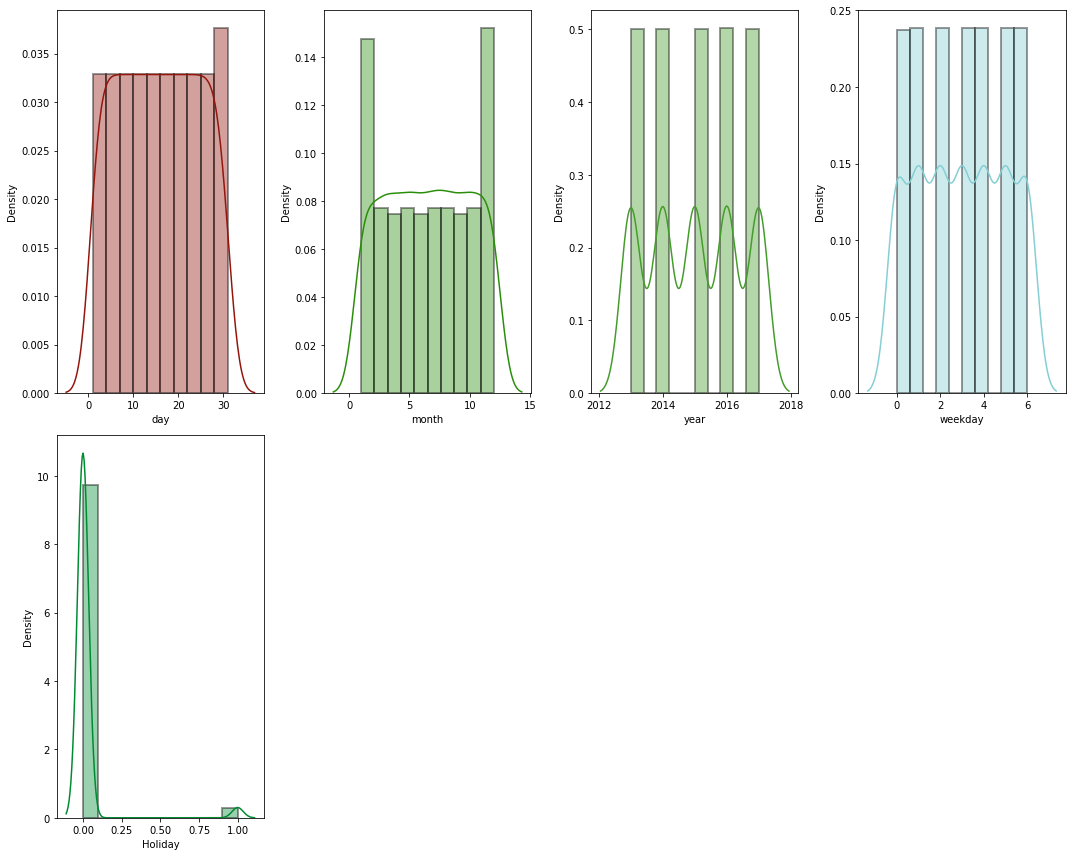

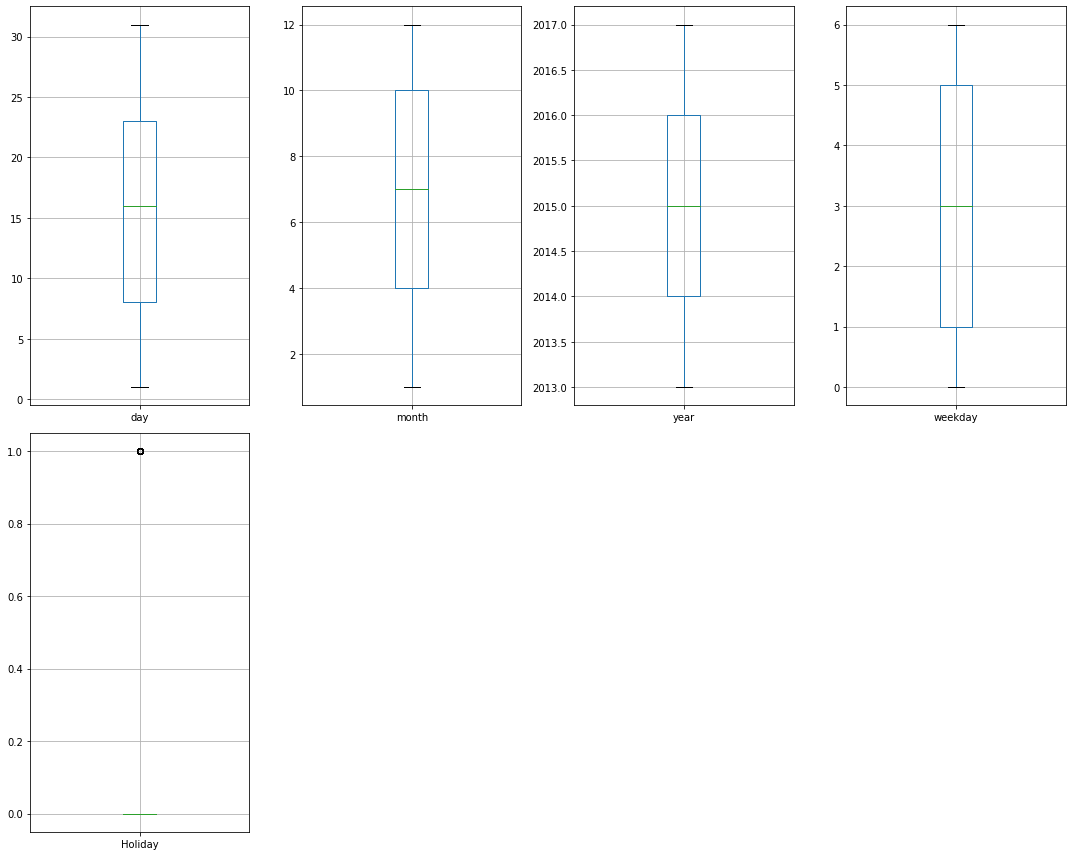

In [11]:
# visualization the all the attribute 
nf=['day' ,'month','year','weekday','Holiday']
n=4
clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(data[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    data.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [12]:
# spilt the data for training and testing. Testing having last one year (2017) and training contain 4 years ( 2013,2014,2015,2016)
unique_years = data['year'].unique()

# split the data into training and test sets
train_years = unique_years[:-1]
test_years = unique_years[-1]
print(unique_years)

[2013 2014 2015 2016 2017]


In [13]:
print(train_years.shape)
print(test_years.shape)

(4,)
()


In [14]:
train_data = data[data['year'].isin(train_years)]
test_data = data[data['year'] == test_years]

In [15]:
print(train_data.shape)
print(test_data.shape)

(1461, 7)
(365, 7)


In [16]:
X_train = train_data[['day', 'month', 'year', 'weekday', 'Holiday']]
y_train = train_data['sales']
X_test = test_data[['day', 'month', 'year', 'weekday', 'Holiday']]
y_test = test_data['sales']

In [17]:
# define the function for graph and evaluating paramater for the model
CM =pd.DataFrame(np.zeros([14,6]), columns=['Train_R2','Train_MSE','Train_RMSE','Test_R2','Test_MSE','Test_RMSE'])
def Evaluate(n, y_pred1,y_pred2):
  #plot the graph testing vs predicated value  
  plt.scatter(range(len(y_test)), y_test, color='blue')
  plt.scatter(range(len(y_pred2)), y_pred2, color='red')
  plt.show()
  # evaluate the model on the training data

  print('{}{}\033[1m Training Set \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))

  train_r2=r2_score(y_train, y_pred1)
  CM.loc[n,'Train_R2'] = train_r2
  print("R2 Score:", train_r2)
  train_mse = mean_squared_error(y_train, y_pred1)
  CM.loc[n,'Train_MSE']=train_mse
  print("Mean square error ",train_mse)
  train_rmse=math.sqrt(mean_squared_error(y_train, y_pred1))
  CM.loc[n,'Train_RMSE'] = train_rmse
  print("Root Mean square error",train_rmse)

  print('{}{}\033[1m Testing Set \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))

  # evaluate the model on the test data
  test_r2=r2_score(y_test, y_pred2)
  CM.loc[n,'Test_R2'] = test_r2
  print("R2 Score:", test_r2)
  test_mse=mean_squared_error(y_test, y_pred2)
  CM.loc[n,'Test_MSE'] = test_mse
  print("Mean square error ",test_mse)
  test_rmse=math.sqrt(mean_squared_error(y_test, y_pred2))
  CM.loc[n,'Test_RMSE'] = test_rmse
  print("Root Mean square error",test_rmse)

  # plot the graph for original data vs predicated value 
  fig, ax = plt.subplots(figsize=(15,5))
  sns.lineplot(data.date, data.sales, data=data, ax=ax, 
              label='Original', color='mediumblue')

  sns.lineplot(test_data.date, y_pred2.reshape(-1), data=test_data, ax=ax, 
              label='Predicted', color='Red')

  ax.set(xlabel = "Date",
        ylabel = "Sales",
        title = " Sales Forecasting Prediction")

  ax.legend()

  sns.despine()


<<<----------------------------------- Evaluating on Random Forest Model ----------------------------------->>>



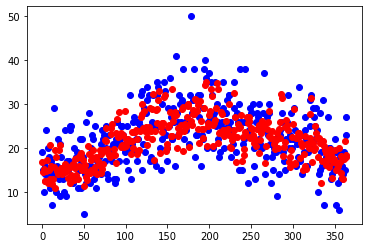

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.9200506451124983
Mean square error  3.452960574948665
Root Mean square error 1.8582143511846703
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.3130889691269251
Mean square error  33.11984136986301
Root Mean square error 5.7549840460129005


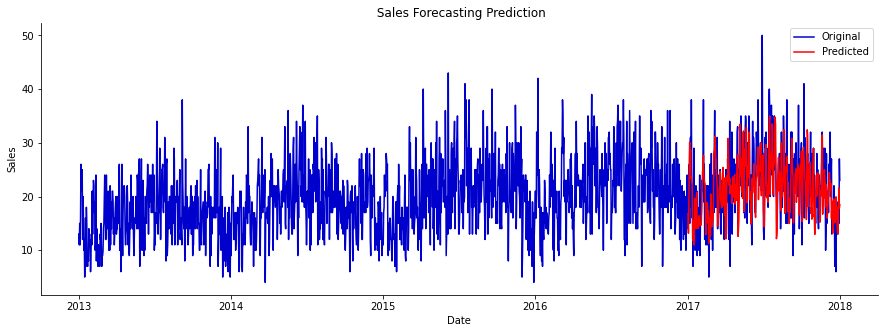

In [18]:

# model
RF = RandomForestRegressor(n_estimators=100)

# train the model on the training data
RF.fit(X_train, y_train)

#predict the traing and testing values
pred1 = RF.predict(X_train)
pred2 = RF.predict(X_test)

print('{}{}\033[1m Evaluating on Random Forest Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)


Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating on Linear Model ----------------------------------->>>



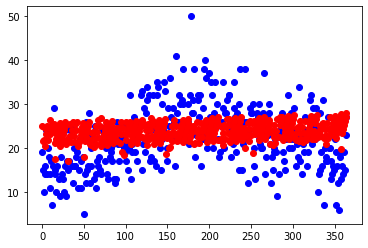

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.175717215032961
Mean square error  35.600236713667556
Root Mean square error 5.966593392687955
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.005434133464860547
Mean square error  47.9536100761944
Root Mean square error 6.924854516608591


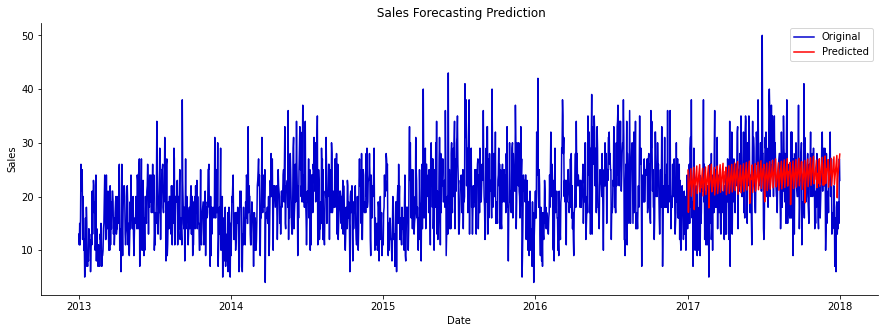

In [19]:
# model
LR = LinearRegression()

# train the model on the training data
LR.fit(X_train, y_train)

#predict the traing and testing values
pred1 = LR.predict(X_train)
pred2 = LR.predict(X_test)

print('{}{}\033[1m Evaluating on Linear Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating on Lasso Model ----------------------------------->>>



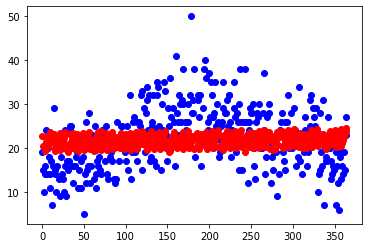

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.1446771480733039
Mean square error  36.94083699251006
Root Mean square error 6.077897415431595
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.04853403622098895
Mean square error  45.8755215346184
Root Mean square error 6.7731470923506745


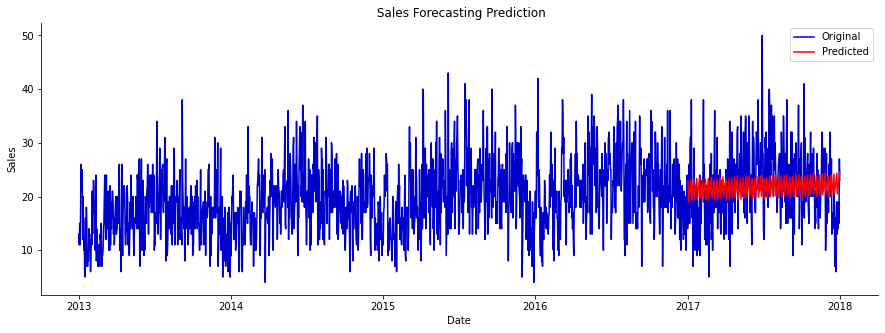

In [20]:
# model
Las = Lasso()

# train the model on the training data
Las.fit(X_train, y_train)

#predict the traing and testing values
pred1 = Las.predict(X_train)
pred2 = Las.predict(X_test)

print('{}{}\033[1m Evaluating on Lasso Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating on ElasticNet Model ----------------------------------->>>



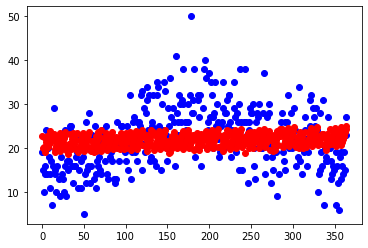

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.14881798308909233
Mean square error  36.76199702467037
Root Mean square error 6.063167243666496
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.05187585056964861
Mean square error  45.714393883233235
Root Mean square error 6.761242037024946


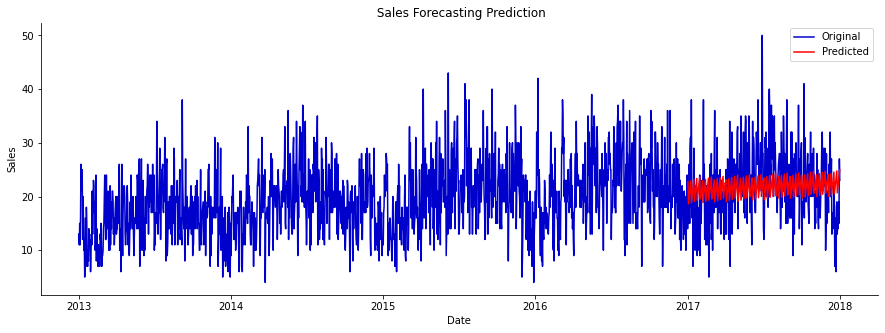

In [21]:
#model
EN = ElasticNet()

# train the model on the training data
EN.fit(X_train, y_train)
# train the model on the training data
EN.fit(X_train, y_train)

#predict the traing and testing values
pred1 = EN.predict(X_train)
pred2 = EN.predict(X_test)

print('{}{}\033[1m Evaluating on ElasticNet Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(3, pred1, pred2)

[04:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<<<----------------------------------- Evaluating on XGBoost Model ----------------------------------->>>



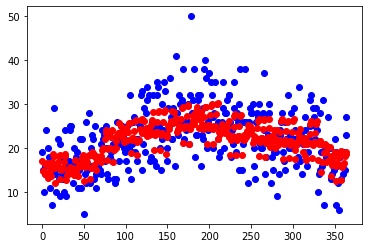

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.5692718605282707
Mean square error  18.60286785565265
Root Mean square error 4.313104201807864
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.401366880910793
Mean square error  28.863467104001636
Root Mean square error 5.372473090114239


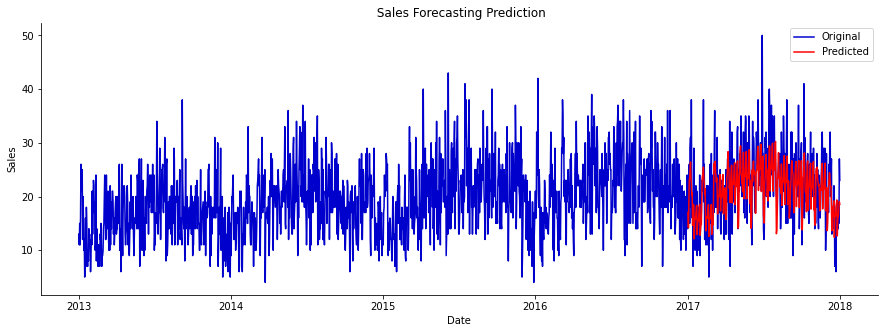

In [22]:
#model
XGB = xgb.XGBRegressor()

# train the model on the training data
XGB.fit(X_train, y_train)

#predict the traing and testing values
pred1 = XGB.predict(X_train)
pred2 = XGB.predict(X_test)

print('{}{}\033[1m Evaluating on XGBoost Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(4, pred1, pred2)

<<<----------------------------------- Evaluating on Decision Tree Model ----------------------------------->>>



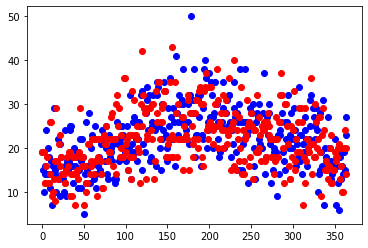

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 1.0
Mean square error  0.0
Root Mean square error 0.0
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: -0.17457530334585702
Mean square error  56.632876712328766
Root Mean square error 7.525481825925086


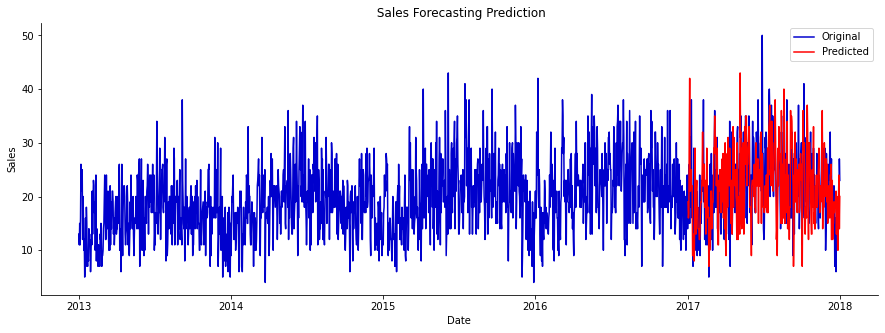

In [23]:
#model
DT = DecisionTreeRegressor()

# train the model on the training data
DT.fit(X_train, y_train)

#predict the traing and testing values
pred1 = DT.predict(X_train)
pred2 = DT.predict(X_test)

print('{}{}\033[1m Evaluating on Decision Tree Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(5, pred1, pred2)

<<<----------------------------------- Evaluating on Gaussian Model ----------------------------------->>>



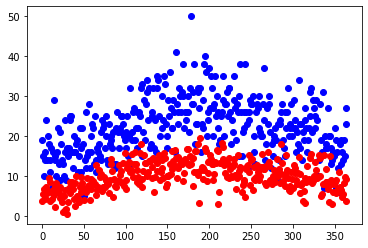

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 1.0
Mean square error  1.6052035295935017e-18
Root Mean square error 1.2669662701088383e-09
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: -2.834156762175364
Mean square error  184.86624619935648
Root Mean square error 13.596552732194896


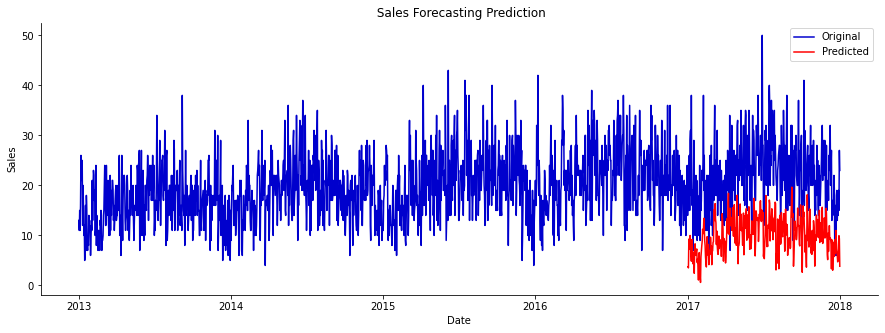

In [24]:
#model
GP = GaussianProcessRegressor()

# train the model on the training data
GP.fit(X_train, y_train)

#predict the traing and testing values
pred1 = GP.predict(X_train)
pred2 = GP.predict(X_test)

print('{}{}\033[1m Evaluating on Gaussian Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(6, pred1, pred2)

<<<----------------------------------- Evaluating on SVR Model ----------------------------------->>>



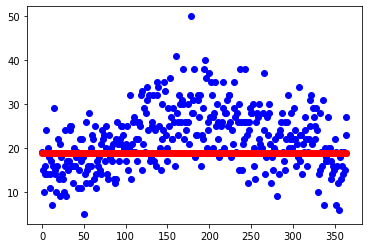

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: -0.0059987726734471725
Mean square error  43.44843189011386
Root Mean square error 6.5915424515142025
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: -0.22290650273371426
Mean square error  58.96319546540878
Root Mean square error 7.678749602989329


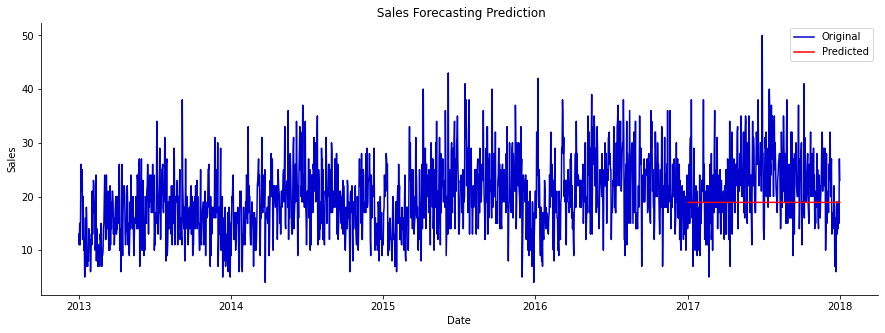

In [25]:
#model
SVR = SVR()

# train the model on the training data
SVR.fit(X_train, y_train)

#predict the traing and testing values
pred1 = SVR.predict(X_train)
pred2 = SVR.predict(X_test)

print('{}{}\033[1m Evaluating on SVR Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(7, pred1, pred2)

<<<----------------------------------- Evaluating on K-NN Model ----------------------------------->>>



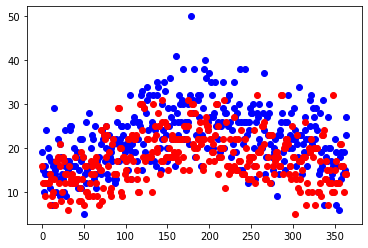

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: -0.06987934469795243
Mean square error  46.20739219712526
Root Mean square error 6.7976019445923175
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: -0.44181093063217913
Mean square error  69.51780821917808
Root Mean square error 8.33773399786645


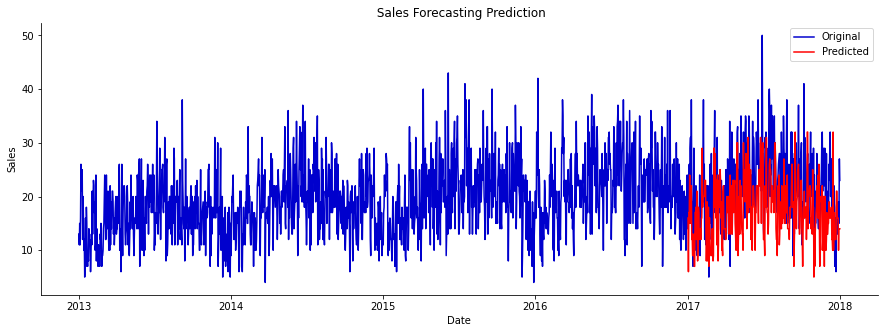

In [26]:
#model
KNN = KNeighborsClassifier()

# train the model on the training data
KNN.fit(X_train, y_train)

#predict the traing and testing values
pred1 = KNN.predict(X_train)
pred2 = KNN.predict(X_test)

print('{}{}\033[1m Evaluating on K-NN Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(8, pred1, pred2)

<<<----------------------------------- Evaluating on Extra-Tree Model ----------------------------------->>>



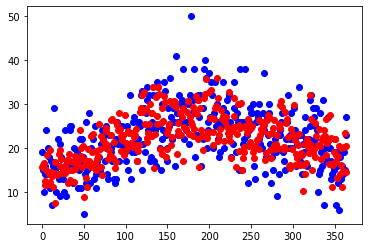

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.999999939777785
Mean square error  2.600958247775256e-06
Root Mean square error 0.0016127486623076937
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.23567463773011899
Mean square error  36.85242136986301
Root Mean square error 6.070619521091979


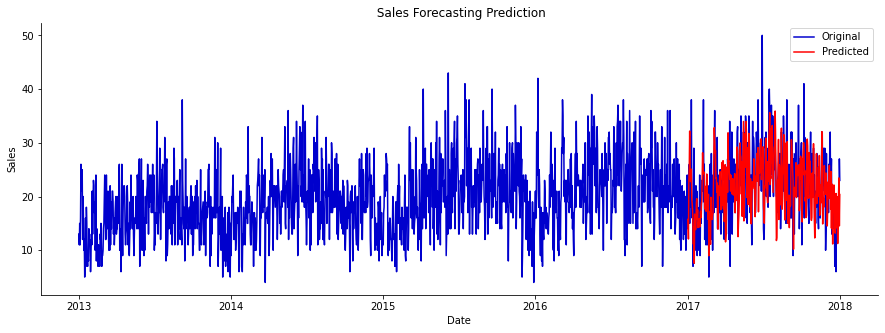

In [27]:
#model
ET = ExtraTreesRegressor()

# train the model on the training data
ET.fit(X_train, y_train)

#predict the traing and testing values
pred1 = ET.predict(X_train)
pred2 = ET.predict(X_test)

print('{}{}\033[1m Evaluating on Extra-Tree Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(9, pred1, pred2)

<<<----------------------------------- Evaluating on Adaboost Model ----------------------------------->>>



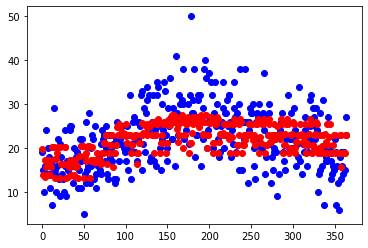

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.3973615264727349
Mean square error  26.027563236313146
Root Mean square error 5.101721595335554
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.3408938138843953
Mean square error  31.779213535555833
Root Mean square error 5.6373055208633


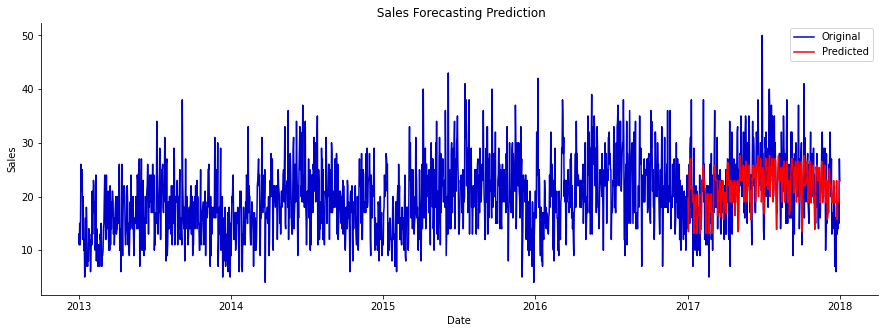

In [28]:
#model
ada = AdaBoostRegressor()

# train the model on the training data
ada.fit(X_train, y_train)

#predict the traing and testing values
pred1 = ada.predict(X_train)
pred2 = ada.predict(X_test)

print('{}{}\033[1m Evaluating on Adaboost Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(10, pred1, pred2)

<<<----------------------------------- Evaluating on LGM Model ----------------------------------->>>



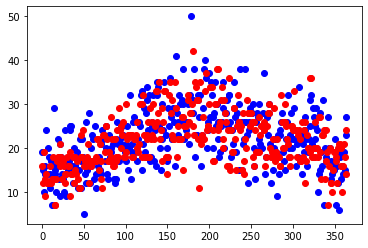

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.994881111728252
Mean square error  0.22108145106091717
Root Mean square error 0.4701929934196353
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.006631248943337442
Mean square error  47.895890410958906
Root Mean square error 6.920685689363367


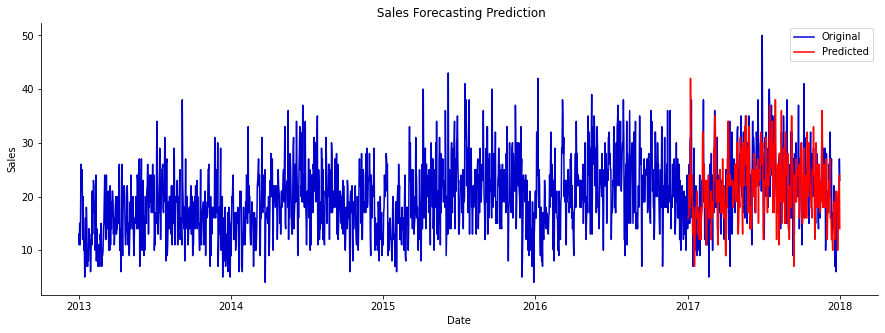

In [29]:
#model
LGB = LGBMClassifier()

# train the model on the training data
LGB.fit(X_train, y_train)

#predict the traing and testing values
pred1 = LGB.predict(X_train)
pred2 = LGB.predict(X_test)

print('{}{}\033[1m Evaluating on LGM Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(11, pred1, pred2)

Epoch 1/200
23/23 - 5s - loss: 142.1911 - 5s/epoch - 233ms/step
Epoch 2/200
23/23 - 1s - loss: 45.6009 - 942ms/epoch - 41ms/step
Epoch 3/200
23/23 - 1s - loss: 43.0551 - 900ms/epoch - 39ms/step
Epoch 4/200
23/23 - 1s - loss: 43.1084 - 956ms/epoch - 42ms/step
Epoch 5/200
23/23 - 1s - loss: 43.2907 - 905ms/epoch - 39ms/step
Epoch 6/200
23/23 - 1s - loss: 43.3765 - 959ms/epoch - 42ms/step
Epoch 7/200
23/23 - 1s - loss: 43.4070 - 942ms/epoch - 41ms/step
Epoch 8/200
23/23 - 1s - loss: 43.4167 - 1s/epoch - 59ms/step
Epoch 9/200
23/23 - 2s - loss: 43.4189 - 2s/epoch - 75ms/step
Epoch 10/200
23/23 - 2s - loss: 43.4195 - 2s/epoch - 75ms/step
Epoch 11/200
23/23 - 2s - loss: 43.4189 - 2s/epoch - 69ms/step
Epoch 12/200
23/23 - 2s - loss: 43.4185 - 2s/epoch - 72ms/step
Epoch 13/200
23/23 - 2s - loss: 43.4168 - 2s/epoch - 70ms/step
Epoch 14/200
23/23 - 2s - loss: 43.4150 - 2s/epoch - 75ms/step
Epoch 15/200
23/23 - 2s - loss: 43.4114 - 2s/epoch - 74ms/step
Epoch 16/200
23/23 - 2s - loss: 43.4071 - 2s

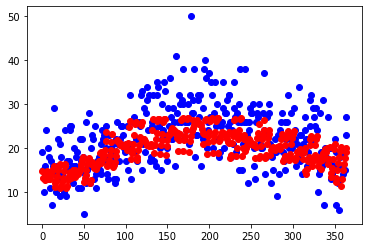

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.4086178505004996
Mean square error  25.541409931619064
Root Mean square error 5.053851000140296
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.29134442172159725
Mean square error  34.16826820879231
Root Mean square error 5.845362966385604


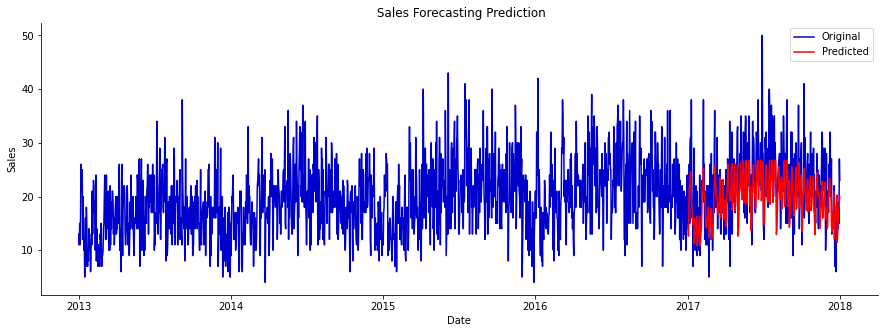

In [30]:
# reshape according to LSTM
Train_X_std1 = X_train.values.reshape(X_train.shape[0], X_train.shape[1],1)
Test_X_std1 = X_test.values.reshape(X_test.shape[0], X_test.shape[1],1)
#model
model = Sequential()
model.add(LSTM(256, return_sequences = True, input_shape = (Train_X_std1.shape[1], 1)))
model.add(LSTM(128,input_shape = (Train_X_std1.shape[1], 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(Train_X_std1, y_train, epochs = 200, batch_size = 64, verbose = 2, shuffle = False)


#predict the traing and testing values
pred1 = model.predict(X_train)
pred2 = model.predict(X_test)

print('{}{}\033[1m Evaluating on LSTM Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(12, pred1, pred2)

Epoch 1/150
46/46 - 11s - loss: 175.3578 - 11s/epoch - 243ms/step
Epoch 2/150
46/46 - 3s - loss: 83.0140 - 3s/epoch - 67ms/step
Epoch 3/150
46/46 - 3s - loss: 55.4406 - 3s/epoch - 67ms/step
Epoch 4/150
46/46 - 3s - loss: 45.9962 - 3s/epoch - 68ms/step
Epoch 5/150
46/46 - 3s - loss: 43.6665 - 3s/epoch - 70ms/step
Epoch 6/150
46/46 - 3s - loss: 43.3883 - 3s/epoch - 69ms/step
Epoch 7/150
46/46 - 3s - loss: 43.4909 - 3s/epoch - 71ms/step
Epoch 8/150
46/46 - 3s - loss: 43.5968 - 3s/epoch - 71ms/step
Epoch 9/150
46/46 - 3s - loss: 43.6612 - 3s/epoch - 67ms/step
Epoch 10/150
46/46 - 3s - loss: 43.6978 - 3s/epoch - 69ms/step
Epoch 11/150
46/46 - 3s - loss: 43.7202 - 3s/epoch - 69ms/step
Epoch 12/150
46/46 - 3s - loss: 43.7358 - 3s/epoch - 69ms/step
Epoch 13/150
46/46 - 3s - loss: 43.7480 - 3s/epoch - 67ms/step
Epoch 14/150
46/46 - 3s - loss: 43.7583 - 3s/epoch - 69ms/step
Epoch 15/150
46/46 - 3s - loss: 43.7672 - 3s/epoch - 71ms/step
Epoch 16/150
46/46 - 3s - loss: 43.7752 - 3s/epoch - 70ms/st

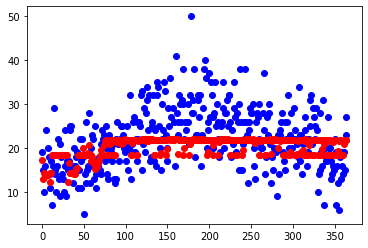

<<<----------------------------------- Training Set ----------------------------------->>>

R2 Score: 0.21088374736843574
Mean square error  34.08141708237827
Root Mean square error 5.837929177574722
<<<----------------------------------- Testing Set ----------------------------------->>>

R2 Score: 0.10712861607090518
Mean square error  43.05034752729985
Root Mean square error 6.561276364191639


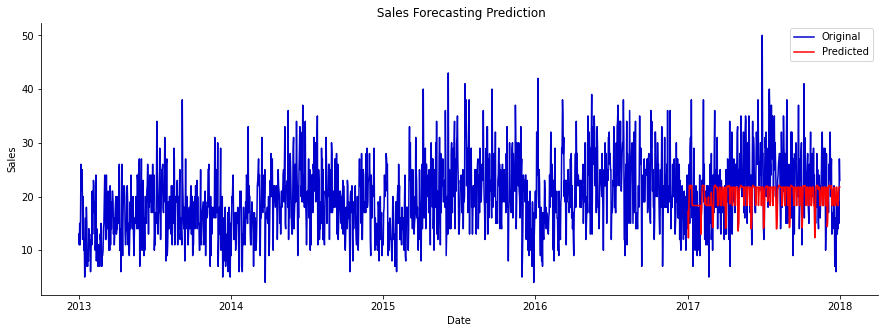

In [31]:
# reshape data
Train_X_std1 = X_train.values.reshape(X_train.shape[0], X_train.shape[1],1)
Test_X_std1 = X_test.values.reshape(X_test.shape[0], X_test.shape[1],1)

# model
model = Sequential()
model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape = (Train_X_std1.shape[1], 1)))
model.add(Bidirectional(LSTM(128)))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(Train_X_std1, y_train, epochs = 150, batch_size = 32, verbose = 2, shuffle = False)


#predict the traing and testing values
pred1 = model.predict(X_train)
pred2 = model.predict(X_test)

print('{}{}\033[1m Evaluating on Bi-LSTM Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)

Evaluate(13, pred1, pred2)

In [32]:
EMC = CM.copy()
EMC.index = ['Random Forest', 'Linear' , 'Lasso', 'ElasticNet', 'XGBoost', 'Decision Tree', 'Gaussian' ,'SVR', 'K-NN', 'Extra-Tree', 'Adaboost', 'LGB', 'LSTM', 'Bi-LSTM']
EMC

,Train_R2,Train_MSE,Train_RMSE,Test_R2,Test_MSE,Test_RMSE
Random Forest,0.920051,3.452961e+00,1.858214e+00,0.313089,33.119841,5.754984
Linear,0.175717,3.560024e+01,5.966593e+00,0.005434,47.953610,6.924855
Lasso,0.144677,3.694084e+01,6.077897e+00,0.048534,45.875522,6.773147
ElasticNet,0.148818,3.676200e+01,6.063167e+00,0.051876,45.714394,6.761242
XGBoost,0.569272,1.860287e+01,4.313104e+00,0.401367,28.863467,5.372473
Decision Tree,1.000000,0.000000e+00,0.000000e+00,-0.174575,56.632877,7.525482
Gaussian,1.000000,1.605204e-18,1.266966e-09,-2.834157,184.866246,13.596553
SVR,-0.005999,4.344843e+01,6.591542e+00,-0.222907,58.963195,7.678750
K-NN,-0.069879,4.620739e+01,6.797602e+00,-0.441811,69.517808,8.337734
Extra-Tree,1.000000,2.600958e-06,1.612749e-03,0.235675,36.852421,6.070620


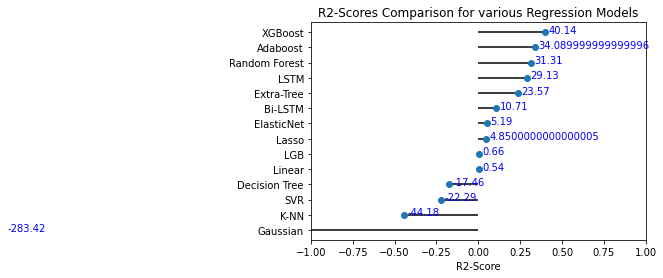

In [33]:
R2 = round(EMC['Test_R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([-1,1])
plt.show()

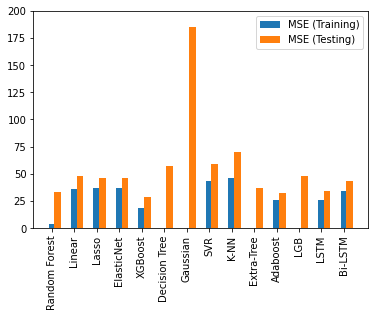

In [34]:
n=14  # number of algoirthm 
r = np.arange(n)
width = 0.25

# graph of training and testing value of MSE
plt.bar(r, CM['Train_MSE'], width=0.3, label='MSE (Training)')
plt.bar(r+width, CM['Test_MSE'], width=0.3, label='MSE (Testing)')
plt.xticks(r,EMC.index, rotation =90)
plt.legend()
plt.ylim([0,200])
plt.show()

In [35]:
# generating next 6 month date for predication
df_test = pd.DataFrame({'date':pd.date_range(start='1/1/2018', end='06/30/2018')})
print(df_test)

          date
0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
..         ...
176 2018-06-26
177 2018-06-27
178 2018-06-28
179 2018-06-29
180 2018-06-30

[181 rows x 1 columns]


In [36]:
# extract the day, month, and year, week day
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['day'] = df_test['date'].dt.day
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year
df_test['weekday'] = df_test['date'].dt.weekday

In [37]:
# holiday
cal = calendar()
holidays = cal.holidays(start=df_test['date'].min(), end=df_test['date'].max())

df_test['Holiday'] = df_test['date'].isin(holidays)
print(df_test)

          date  day  month  year  weekday  Holiday
0   2018-01-01    1      1  2018        0     True
1   2018-01-02    2      1  2018        1    False
2   2018-01-03    3      1  2018        2    False
3   2018-01-04    4      1  2018        3    False
4   2018-01-05    5      1  2018        4    False
..         ...  ...    ...   ...      ...      ...
176 2018-06-26   26      6  2018        1    False
177 2018-06-27   27      6  2018        2    False
178 2018-06-28   28      6  2018        3    False
179 2018-06-29   29      6  2018        4    False
180 2018-06-30   30      6  2018        5    False

[181 rows x 6 columns]


In [38]:
# convert holiday into 0 and 1
le = preprocessing.LabelEncoder()
df_test['Holiday'] = le.fit_transform(df_test.Holiday.values)

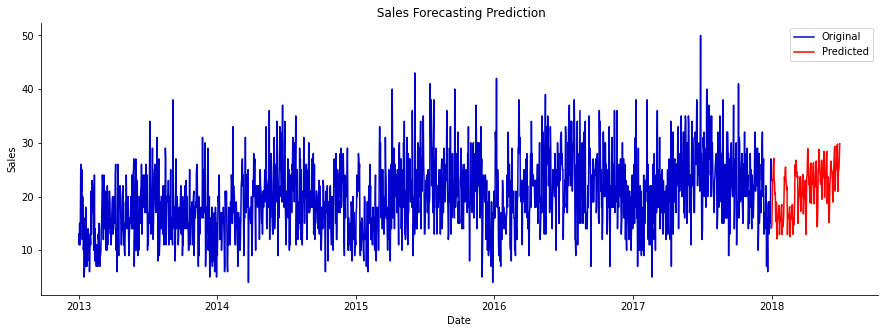

In [39]:
# run with best model

X_test_pr = df_test[['day', 'month', 'year', 'weekday', 'Holiday']]

pred_fu = XGB.predict(X_test_pr)

# generate the graph

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data.date, data.sales, data=data, ax=ax, 
            label='Original', color='mediumblue')

sns.lineplot(df_test.date, pred_fu.reshape(-1), data=df_test, ax=ax, 
            label='Predicted', color='Red')

ax.set(xlabel = "Date",
      ylabel = "Sales",
      title = " Sales Forecasting Prediction")

ax.legend()

sns.despine()
